In [3]:
import json
import pandas as pd
from pprint import pprint
%matplotlib inline
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt
import string
import re

In [12]:
df = pd.read_csv('casualties.txt',sep=',')
df = df.drop(['IYR','COVERDATA'],1)
df = df.drop(['DUMMY','DUMMY1','DUMMY2','DUMMY3'],1)
df = df.drop(['OCCODE','TCODE'],1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9282 entries, 0 to 9281
Data columns (total 42 columns):
IMO         9282 non-null int64
RAILROAD    9282 non-null object
INCDTNO     9282 non-null object
TYPPERS     9282 non-null object
JOBCODE     9282 non-null object
NATINJ      9282 non-null object
LOCATION    9282 non-null object
IFATAL      9282 non-null object
AGE         8666 non-null float64
DAYSABS     9282 non-null float64
DAYSRES     9282 non-null float64
STATE       9281 non-null float64
TYPRR       9277 non-null object
REGION      9281 non-null float64
NARRLEN     9282 non-null float64
CASFATAL    9282 non-null object
CAS57       9282 non-null object
CAS54       9282 non-null object
DAY         9282 non-null int64
YEAR4       9282 non-null int64
TIMEHR      9282 non-null float64
TIMEMIN     9282 non-null float64
AMPM        9282 non-null object
COUNTY      9282 non-null object
CNTYCD      9272 non-null float64
STCNTY      9272 non-null object
ALCOHOL     9282 non-null obj

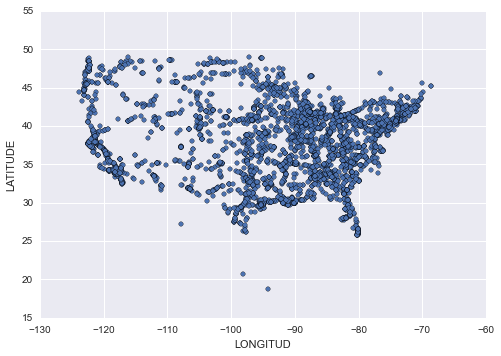

In [13]:
import sklearn.metrics as metrics
df = df[df['LONGITUD'] != 0]
c = df[['LONGITUD','LATITUDE']]
c.plot(kind='scatter', x='LONGITUD', y='LATITUDE');

In [73]:
wrong = df[df.LATITUDE < 22 ]
wrong.LATITUDE.value_counts()

0.00     4783
18.69       1
20.67       1
dtype: int64

[ 6  1  5 12  7 11  2 10  4  3  8  9]


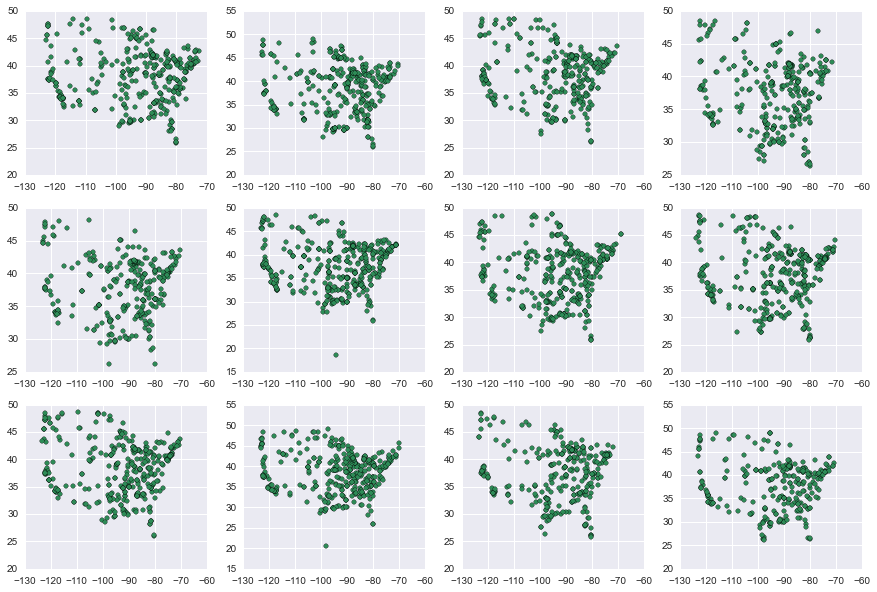

In [44]:
print df.IMO.unique()

idx = 0
fig, axes = plt.subplots(3,4,figsize=(15,10))
for i in range(1,13):
    row = idx / 4
    col = idx % 4
    c = df[['LONGITUD','LATITUDE']][df.IMO==i]
    axes[row][col].scatter(c.LONGITUD, c.LATITUDE,c='seagreen', label=i)
    idx = idx + 1
#    c.plot(kind='scatter', x='LONGITUD', y='LATITUDE', label=i);

In [85]:
#df.date = df.date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d"))
df.INCDTNO = df.INCDTNO.apply(lambda d: d.strip())

In [4]:
cas = pd.read_csv('d.txt',sep='\t')
#cas = cas.fillna(0)
cas.info()
acceptable_characters = string.letters + string.digits + "-_*."
filter(lambda c: c in acceptable_characters, cas.Type)
#cas['Type'] = cas['Type'].decode('unicode_escape').encode('ascii','ignore')
for i in cas['Type']:
    i = i[:len(i)-1]
for idx, row in cas.iterrows():
    i = row['Type']
    i = i[:len(i)-1]    
    cas.ix[idx,'Type']=i

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9215 entries, 0 to 9214
Data columns (total 13 columns):
Unnamed: 0    0 non-null float64
RR            9215 non-null object
Month         9215 non-null object
Day           9215 non-null int64
TA            9215 non-null int64
Incident      9215 non-null object
Type          9215 non-null object
Job           4685 non-null object
Condition     9215 non-null object
Event         9215 non-null object
St            9214 non-null object
County        9215 non-null object
Age           8599 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1007.9+ KB


In [5]:
cas = cas.drop('Unnamed: 0',1)

In [54]:
cas.head()
f = cas[cas.Condition=='Fatality']

In [8]:
f.head()

,RR,Month,Day,TA,Incident,Type,Job,Condition,Event,St,County,Age
5,BNSF,January,1,3,SW0114100,Trespasser,0,Fatality,Struck by on-track equipment,NM,CIBOLA,0
9,NJTR,January,1,3,201401002,Trespasser,0,Fatality,Struck by on-track equipment,NJ,UNION,23
15,ATK,January,2,2,131161,Trespasser,0,Fatality,Highway-rail collision/impact,NC,WAKE,21
35,NJTR,January,2,3,201401007,Trespasser,0,Fatality,Struck by on-track equipment,NJ,UNION,56
43,UP,January,2,3,0114SA003,Trespasser,0,Fatality,Struck by on-track equipment,TX,FRIO,37


In [55]:
for idx, row in f.iterrows():
    i = row.Incident
    for jdx, rowj in df.iterrows():
        if i==rowj.INCDTNO:
            f.ix[idx,'Long'] = rowj.LONGITUD
            f.ix[idx,'Lat'] = rowj.LATITUDE
#            print rowj.LATITUDE
            break

In [86]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 816 entries, 5 to 9211
Data columns (total 14 columns):
RR           816 non-null object
Month        816 non-null object
Day          816 non-null int64
TA           816 non-null int64
Incident     816 non-null object
Type         816 non-null object
Job          816 non-null object
Condition    816 non-null object
Event        816 non-null object
St           816 non-null object
County       816 non-null object
Age          816 non-null float64
Long         705 non-null float64
Lat          705 non-null float64
dtypes: float64(3), int64(2), object(9)
memory usage: 95.6+ KB


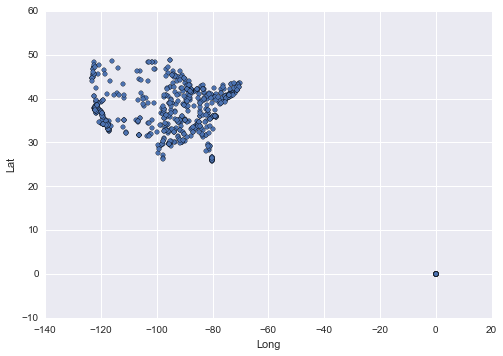

In [57]:
import sklearn.metrics as metrics
#df = df[df['LONGITUD'] != 0]
c = f[['Long','Lat']]
c.plot(kind='scatter', x='Long', y='Lat');

In [10]:
i = cas.RR.unique()
print i
print len(i)

['ATK' 'BNSF' 'CSX' 'NJTR' 'NS' 'PATH' 'UPME' 'BSRX' 'CRSH' 'LI' 'LSI'
 'MBTA' 'MNCW' 'SEPA' 'SRC' 'UP' 'URR' 'GRS' 'KCS' 'NIRC' 'OHCR' 'SCXY'
 'CONW' 'CP' 'SCAX' 'WC' 'BRC' 'PCMZ' 'ACEX' 'CTSR' 'DC' 'KXHR' 'TSU'
 'LIRC' 'LVRX' 'NICD' 'UFRC' 'EVWR' 'WSOR' 'BNSO' 'CCHA' 'DSNG' 'FEC' 'ARR'
 'DL' 'PSBX' 'SFRV' 'AGR' 'BSVY' 'LDRR' 'CLP' 'MRL' 'NCRC' 'WN' 'ZIOF' 'IC'
 'TMBL' 'VREX' 'IANR' 'IAIS' 'VTAZ' 'OSRR' 'NSCR' 'IMSA' 'NPB' 'NVRR'
 'NCTC' 'VTR' 'CDOT' 'RPRC' 'IHB' 'MACZ' 'MNNR' 'PGR' 'NMRX' 'PAL' 'TCWR'
 'BPRR' 'CW' 'FWWR' 'RBMN' 'CRL' 'OTVR' 'PW' 'SKOL' 'GTW' 'HESR' 'NHN'
 'LSRC' 'NERR' 'NYSW' 'POVA' 'UTAX' 'GRW' 'GWR' 'SNVX' 'TRRA' 'WNYP' 'CTRR'
 'JVRR' 'CCRL' 'DART' 'SBVR' 'CC' 'CFRC' 'EWR' 'NOPB' 'IMRR' 'DMVW' 'SW'
 'PTRA' 'CLC' 'COER' 'FGLK' 'LMIC' 'RRVW' 'SJVR' 'WGSH' 'FSR' 'TRE' 'ALS'
 'TXPF' 'NECR' 'PARN' 'CBRY' 'WMSR' 'GDLK' 'NBER' 'ATN' 'GNBC' 'TVRM' 'DR'
 'DSRC' 'GSM' 'TMEV' 'SCXF' 'FCEN' 'SDTI' 'INRD' 'TRMW' 'GCRX' 'CRRX'
 'GMRC' 'CARR' 'GCW' 'YVRR' 'AKMD' 'RTRX' 'CBRW' 'SR

In [9]:
cas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9215 entries, 0 to 9214
Data columns (total 13 columns):
Unnamed: 0    0 non-null float64
RR            9215 non-null object
Month         9215 non-null object
Day           9215 non-null int64
TA            9215 non-null int64
Incident      9215 non-null object
Type          9215 non-null object
Job           4685 non-null object
Condition     9215 non-null object
Event         9215 non-null object
St            9214 non-null object
County        9215 non-null object
Age           8599 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 1007.9+ KB
